In [1]:
# Database: Central Statistics Office
# Title: CJQ06 - Recorded crime incidents (Under Reservation)
# Source: https://data.cso.ie/table/CJQ06
# File name: CJQ06.20231115T191114.csv
# Last Updated: 25/09/2023 11:00:00

# Crime Analysis in Dublin from 2003-Q1 to 2023-Q2

## Quickly Data Analysis

In [2]:
#importing dataset
import pandas as pd

dataframe = pd.read_csv("CJQ06.20231115T191114.csv")

In [3]:
num_rows, num_cols = dataframe.shape

print("Number of Rows:", num_rows)
print("Number of Columns (Attributes):", num_cols)

Number of Rows: 163016
Number of Columns (Attributes): 6


In [4]:
#analysing columns types
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163016 entries, 0 to 163015
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   STATISTIC Label  163016 non-null  object
 1   Quarter          163016 non-null  object
 2   Garda Division   163016 non-null  object
 3   Type of Offence  163016 non-null  object
 4   UNIT             163016 non-null  object
 5   VALUE            163016 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 7.5+ MB


In [5]:
#5 categorical (object) and 1 numerical (int64)

In [6]:
#analysing head dataframe
dataframe.head()

,STATISTIC Label,Quarter,Garda Division,Type of Offence,UNIT,VALUE
0,Recorded crime incidents (Under Reservation),2003Q1,Cavan/Monaghan Garda Division,Homicide offences,Number,1
1,Recorded crime incidents (Under Reservation),2003Q1,Cavan/Monaghan Garda Division,Murder,Number,0
2,Recorded crime incidents (Under Reservation),2003Q1,Cavan/Monaghan Garda Division,Manslaughter,Number,0
3,Recorded crime incidents (Under Reservation),2003Q1,Cavan/Monaghan Garda Division,Infanticide,Number,0
4,Recorded crime incidents (Under Reservation),2003Q1,Cavan/Monaghan Garda Division,Dangerous driving leading to death,Number,1


In [7]:
#analysing tail dataframe
dataframe.tail()

,STATISTIC Label,Quarter,Garda Division,Type of Offence,UNIT,VALUE
163011,Recorded crime incidents (Under Reservation),2023Q2,D.M.R. Western Garda Division,"Offences against government, justice procedure...",Number,367
163012,Recorded crime incidents (Under Reservation),2023Q2,D.M.R. Western Garda Division,Offences against government and its agents,Number,3
163013,Recorded crime incidents (Under Reservation),2023Q2,D.M.R. Western Garda Division,Organisation of crime and conspiracy to commit...,Number,0
163014,Recorded crime incidents (Under Reservation),2023Q2,D.M.R. Western Garda Division,Perverting the course of justice,Number,1
163015,Recorded crime incidents (Under Reservation),2023Q2,D.M.R. Western Garda Division,"Offences while in custody, breach of court orders",Number,363


# Data Preparation

## Removing unnecessary columns

In [8]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163016 entries, 0 to 163015
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   STATISTIC Label  163016 non-null  object
 1   Quarter          163016 non-null  object
 2   Garda Division   163016 non-null  object
 3   Type of Offence  163016 non-null  object
 4   UNIT             163016 non-null  object
 5   VALUE            163016 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 7.5+ MB


In [9]:
dataframe["STATISTIC Label"].unique()

array(['Recorded crime incidents (Under Reservation)'], dtype=object)

In [10]:
dataframe = dataframe.drop(["STATISTIC Label"], axis=1)

In [11]:
dataframe["UNIT"].unique()

array(['Number'], dtype=object)

In [12]:
dataframe = dataframe.drop(["UNIT"], axis=1)

In [13]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163016 entries, 0 to 163015
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Quarter          163016 non-null  object
 1   Garda Division   163016 non-null  object
 2   Type of Offence  163016 non-null  object
 3   VALUE            163016 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 5.0+ MB


## Characterisation of the dataset

In [14]:
#check if has null values in target column
dataframe.isnull().sum()

Quarter            0
Garda Division     0
Type of Offence    0
VALUE              0
dtype: int64

In [15]:
#check if has zero values in target column
dataframe[dataframe["VALUE"] == 0].shape

(49988, 4)

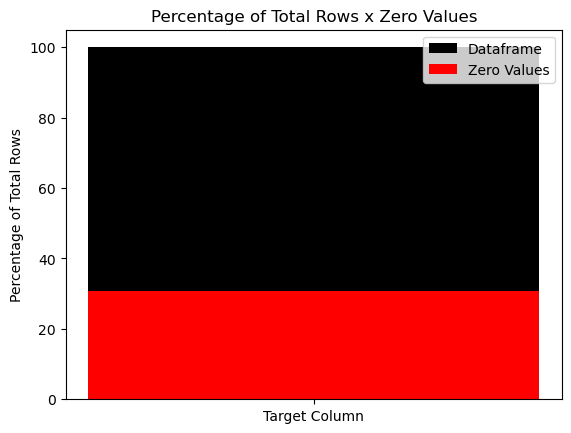

In [16]:
import matplotlib.pyplot as plt

# Create two dataframes: one for the entire data and another for zero values
target = dataframe[["VALUE"]]
zero_values = target[target["VALUE"] == 0]

# Values to compare
values_to_compare = [100, zero_values.shape[0] / target.shape[0] * 100]

# Plot the values in the same candlestick
plt.bar('Target Column', values_to_compare[0], color='black', label='Dataframe')
plt.bar('Target Column', values_to_compare[1], color='red', label='Zero Values')

# Customize the plot
plt.ylabel('Percentage of Total Rows')
plt.title('Percentage of Total Rows x Zero Values')
plt.legend()

# Show the plot
plt.show()

In [17]:
#remove zero values on target column
dataframe = dataframe[dataframe["VALUE"] != 0]

## Size, number of attributes, number of observations

In [18]:
num_rows, num_cols = dataframe.shape

print("Number of Rows:", num_rows)
print("Number of Columns (Attributes):", num_cols)

Number of Rows: 113028
Number of Columns (Attributes): 4


# EDA and Visualizations

## Filtering Garda Divisions

In [19]:
#list Garda divisions of dataset
dataframe["Garda Division"].unique()

array(['Cavan/Monaghan Garda Division', 'Donegal Garda Division',
       'Sligo/Leitrim Garda Division', 'Louth Garda Division',
       'Clare Garda Division', 'Mayo Garda Division',
       'Galway Garda Division', 'Roscommon/Longford Garda Division',
       'Cork City Garda Division', 'Cork North Garda Division',
       'Cork West Garda Division', 'Kerry Garda Division',
       'Limerick Garda Division', 'Laois/Offaly Garda Division',
       'Meath Garda Division', 'Wicklow Garda Division',
       'Westmeath Garda Division', 'Kildare Garda Division',
       'Tipperary Garda Division', 'Wexford Garda Division',
       'Kilkenny/Carlow Garda Division', 'Waterford Garda Division',
       'D.M.R. South Central Garda Division',
       'D.M.R. North Central Garda Division',
       'D.M.R. Northern Garda Division', 'D.M.R. Southern Garda Division',
       'D.M.R. Eastern Garda Division', 'D.M.R. Western Garda Division'],
      dtype=object)

In [20]:
#creating a new dataframe with Dublin divisions
dublin_divisions = ["D.M.R. South Central Garda Division",
                    "D.M.R. North Central Garda Division",
                    "D.M.R. Northern Garda Division",
                    "D.M.R. Southern Garda Division",
                    "D.M.R. Eastern Garda Division",
                    "D.M.R. Western Garda Division"]

dataframe = dataframe[dataframe["Garda Division"].isin(dublin_divisions)]

In [21]:
#show filtered dataframe with Dublin divisions
dataframe["Garda Division"].unique()

array(['D.M.R. South Central Garda Division',
       'D.M.R. North Central Garda Division',
       'D.M.R. Northern Garda Division', 'D.M.R. Southern Garda Division',
       'D.M.R. Eastern Garda Division', 'D.M.R. Western Garda Division'],
      dtype=object)

In [22]:
## Filtering Crime Offences

In [23]:
#list crime offences of dataset
dataframe["Type of Offence"].unique()

array(['Homicide offences', 'Murder', 'Manslaughter', 'Sexual offences',
       'Rape and sexual assault',
       'Attempts/threats to murder, assaults, harassments and related offences',
       'Harassment and related offences',
       'Assault causing harm, poisoning', 'Other assault',
       'Dangerous or negligent acts',
       'Driving/in charge of a vehicle while over legal alcohol limit',
       'Endangering traffic offences',
       'Robbery, extortion and hijacking offences',
       'Robbery of an establishment or institution',
       'Robbery of cash or goods in transit', 'Robbery from the person',
       'Carjacking, hijacking/unlawful seizure of aircraft/vessel',
       'Burglary and related offences', 'Aggravated burglary',
       'Burglary (not aggravated)',
       'Possession of an article (with intent to burgle, steal, demand)',
       'Theft and related offences',
       'Theft/taking of vehicle and related offences',
       'Theft from person', 'Theft from shop',
    

In [24]:
#show number of crime offences of dataset
dataframe["Type of Offence"].nunique()

71

In [25]:
#creating a new dataframe with crime offences
offences = ["Homicide offences",
            "Murder",
            "Manslaughter",
            "Sexual offences",
            "Rape and sexual assault"]

dataframe = dataframe[dataframe["Type of Offence"].isin(offences)]

In [26]:
#show filtered dataframe with crime offences
dataframe["Type of Offence"].unique()

array(['Homicide offences', 'Murder', 'Manslaughter', 'Sexual offences',
       'Rape and sexual assault'], dtype=object)